In [1]:
# Import libraries

import pandas as pd
import numpy as np

In [2]:
movie = pd.read_csv(r"C:\Users\ADMIN\Desktop\ML2\movie.csv")
rating = pd.read_csv(r"C:\Users\ADMIN\Desktop\ML2\rating.csv")

In [3]:
# Combine two datasets

df = movie.merge(rating, how="left", on="movieId")
df.head(5)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5


In [4]:
# Set movie unique values

df["title"].nunique()
df["title"].value_counts()

title
Pulp Fiction (1994)                                                                    3498
Forrest Gump (1994)                                                                    3476
Silence of the Lambs, The (1991)                                                       3247
Shawshank Redemption, The (1994)                                                       3216
Jurassic Park (1993)                                                                   3129
                                                                                       ... 
FC Venus (2006)                                                                           1
Extraordinary Adventures of Adèle Blanc-Sec, The (2010)                                   1
Danse: The Paris Opera Ballet, La (La Danse - Le ballet de l'Opéra de Paris) (2009)       1
According to Greta (2009)                                                                 1
Innocence (2014)                                                          

In [5]:
# To exclude movies with less than 1000 votes from the dataset

comment_counts = pd.DataFrame(df["title"].value_counts())
rare_movies = comment_counts[df["title"].value_counts() <= 1000].index
common_movies = df[~df["title"].isin(rare_movies)]

In [6]:
# Create a pivot table for the dataframe with the userIDs in the index, the movie names in the columns, and the ratings as values

user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")
user_movie_df.head(5)

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Aladdin (1992),Alien (1979),Aliens (1986),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),...,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)",Waterworld (1995),When Harry Met Sally... (1989),While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)",X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1.0,3.5,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,...,3.5,NaN,3.5,NaN,NaN,NaN,NaN,NaN,3.5,NaN
2.0,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,5.0,NaN,NaN,NaN,5.0,4.0,3.0,NaN,NaN,4.0,...,4.0,NaN,5.0,NaN,4.0,NaN,NaN,5.0,4.0,NaN
4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [7]:
# Calculate the mean of each row in the user_movie_df DataFrame
row_means = user_movie_df.mean(axis=1)

# Subtract the row means from the original values in the DataFrame to normalize it
matrix_norm = user_movie_df.subtract(row_means, axis=0)

# Display the first 5 rows of the normalized DataFrame
matrix_norm.head(5)


title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Aladdin (1992),Alien (1979),Aliens (1986),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),...,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)",Waterworld (1995),When Harry Met Sally... (1989),While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)",X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1.0,-0.372727,NaN,NaN,NaN,0.127273,0.127273,NaN,NaN,NaN,NaN,...,-0.372727,NaN,-0.372727,NaN,NaN,NaN,NaN,NaN,-0.372727,NaN
2.0,0.437500,NaN,NaN,NaN,0.437500,NaN,NaN,NaN,-1.5625,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,0.473684,NaN,NaN,NaN,0.473684,-0.526316,-1.526316,NaN,NaN,-0.526316,...,-0.526316,NaN,0.473684,NaN,-0.526316,NaN,NaN,0.473684,-0.526316,NaN
4.0,NaN,NaN,-0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,0.525,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.525,NaN,NaN,NaN,NaN,NaN,-2.475000,NaN,NaN


In [8]:
transposed_matrix_norm = matrix_norm.T
transposed_matrix_norm

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,7111.0,7112.0,7113.0,7114.0,7115.0,7116.0,7117.0,7118.0,7119.0,7120.0
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),-0.372727,0.4375,0.473684,NaN,NaN,NaN,-0.785714,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.123457,NaN,NaN,NaN
Ace Ventura: Pet Detective (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.916667,NaN,NaN,...,NaN,NaN,-2.755102,NaN,0.55102,NaN,NaN,NaN,0.142857,NaN
Ace Ventura: When Nature Calls (1995),NaN,NaN,NaN,-0.5,NaN,NaN,NaN,-2.916667,NaN,NaN,...,NaN,NaN,-2.755102,NaN,-0.44898,-1.96988,NaN,NaN,NaN,-1.125
Aladdin (1992),NaN,NaN,NaN,NaN,0.525,NaN,NaN,-0.916667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.96988,0.876543,NaN,0.142857,NaN
Alien (1979),0.127273,0.4375,0.473684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.123457,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
While You Were Sleeping (1995),NaN,NaN,NaN,NaN,NaN,NaN,-0.785714,0.083333,NaN,NaN,...,NaN,NaN,-0.755102,NaN,0.55102,NaN,NaN,NaN,-0.857143,NaN
Who Framed Roger Rabbit? (1988),NaN,NaN,NaN,NaN,NaN,NaN,0.214286,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.96988,NaN,NaN,NaN,NaN
Willy Wonka & the Chocolate Factory (1971),NaN,NaN,0.473684,NaN,-2.475,-2.818182,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.03012,NaN,NaN,NaN,NaN


In [9]:


# Calculate the correlation matrix to determine the similarity between users
user_similarity = transposed_matrix_norm.corr()

# Display the user similarity matrix
user_similarity.head()


userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,7111.0,7112.0,7113.0,7114.0,7115.0,7116.0,7117.0,7118.0,7119.0,7120.0
userId,,,,,,,,,,,,,,,,,,,,,
1.0,1.000000,-0.078811,0.267558,NaN,0.467677,NaN,0.259973,0.000000,0.5,0.320256,...,-0.100000,NaN,-0.288675,0.654654,0.149071,0.395291,0.301322,-0.408248,0.408248,0.500000
2.0,-0.078811,1.000000,NaN,NaN,0.645497,NaN,0.546295,-0.500000,NaN,NaN,...,NaN,NaN,-0.333333,NaN,0.500000,0.797420,-0.444444,1.000000,-1.000000,NaN
3.0,0.267558,NaN,1.000000,0.243975,-0.184208,-0.275839,-0.046332,-0.295804,0.5,0.108148,...,0.438529,NaN,-0.136312,0.108465,-0.750000,-0.173627,0.025651,-0.316228,0.075955,1.000000
4.0,NaN,NaN,0.243975,1.000000,0.320256,NaN,0.133631,0.580487,NaN,NaN,...,-0.755929,NaN,0.491250,NaN,0.035297,0.808290,-0.051699,NaN,-0.469157,NaN
5.0,0.467677,0.645497,-0.184208,0.320256,1.000000,0.206692,0.416618,-0.038224,NaN,NaN,...,NaN,NaN,0.024510,NaN,0.568178,-0.084721,0.233661,-0.577350,-0.454003,0.838525


In [10]:
random_user = 900 #100, 300, 900

In [11]:
user_similarity.drop(index=random_user, inplace= True)
user_similarity.head(10)

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,7111.0,7112.0,7113.0,7114.0,7115.0,7116.0,7117.0,7118.0,7119.0,7120.0
userId,,,,,,,,,,,,,,,,,,,,,
1.0,1.000000,-0.078811,0.267558,NaN,0.467677,NaN,0.259973,0.000000,0.500000,0.320256,...,-0.100000,NaN,-0.288675,0.654654,0.149071,0.395291,0.301322,-0.408248,0.408248,0.500000
2.0,-0.078811,1.000000,NaN,NaN,0.645497,NaN,0.546295,-0.500000,NaN,NaN,...,NaN,NaN,-0.333333,NaN,0.500000,0.797420,-0.444444,1.000000,-1.000000,NaN
3.0,0.267558,NaN,1.000000,0.243975,-0.184208,-0.275839,-0.046332,-0.295804,0.500000,0.108148,...,0.438529,NaN,-0.136312,0.108465,-0.750000,-0.173627,0.025651,-0.316228,0.075955,1.000000
4.0,NaN,NaN,0.243975,1.000000,0.320256,NaN,0.133631,0.580487,NaN,NaN,...,-0.755929,NaN,0.491250,NaN,0.035297,0.808290,-0.051699,NaN,-0.469157,NaN
5.0,0.467677,0.645497,-0.184208,0.320256,1.000000,0.206692,0.416618,-0.038224,NaN,NaN,...,NaN,NaN,0.024510,NaN,0.568178,-0.084721,0.233661,-0.577350,-0.454003,0.838525
6.0,NaN,NaN,-0.275839,NaN,0.206692,1.000000,-0.230769,0.500000,NaN,NaN,...,NaN,NaN,-0.406181,NaN,-0.679900,-0.762493,-0.403280,NaN,NaN,-0.577350
7.0,0.259973,0.546295,-0.046332,0.133631,0.416618,-0.230769,1.000000,0.434861,0.866025,1.000000,...,0.816497,NaN,0.488597,-0.108465,0.110432,0.446635,0.031906,NaN,0.062348,1.000000
8.0,0.000000,-0.500000,-0.295804,0.580487,-0.038224,0.500000,0.434861,1.000000,NaN,0.000000,...,0.771744,NaN,0.452119,0.500000,0.194698,0.892967,-0.089288,1.000000,0.340700,0.551620
9.0,0.500000,NaN,0.500000,NaN,NaN,NaN,0.866025,NaN,1.000000,1.000000,...,1.000000,NaN,NaN,NaN,NaN,0.218218,NaN,NaN,NaN,NaN


In [28]:
n = 10  # Number of similar users to consider
user_similarity_threshold = 0.6  # Similarity threshold

# Filter users based on similarity threshold and get the top N similar users
similar_users = user_similarity[user_similarity[random_user] > user_similarity_threshold][random_user].nlargest(n)

similar_users_df = pd.DataFrame({'Similar Users': similar_users.index, 'Similarity Score': similar_users.values})

# Print the DataFrame
print(f'The top {n} similar users for user {random_user} are:')
print(similar_users_df)

The top 10 similar users for user 900 are:
   Similar Users  Similarity Score
0           33.0               1.0
1           49.0               1.0
2          111.0               1.0
3          173.0               1.0
4          212.0               1.0
5          217.0               1.0
6          353.0               1.0
7          373.0               1.0
8          420.0               1.0
9          428.0               1.0


In [13]:
# Select the row corresponding to the specified user from the normalized matrix
movies_watched = matrix_norm[matrix_norm.index == random_user]

# Drop columns (movies) where all values are NaN for the selected user
movies_watched = movies_watched.dropna(axis=1, how='all')
movies_watched

title,Aladdin (1992),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),Apollo 13 (1995),Armageddon (1998),Back to the Future (1985),Back to the Future Part III (1990),Batman (1989),"Beautiful Mind, A (2001)",...,"Shawshank Redemption, The (1994)",Shrek (2001),"Sixth Sense, The (1999)",Sleepless in Seattle (1993),Star Trek: Generations (1994),Star Wars: Episode IV - A New Hope (1977),Toy Story (1995),Toy Story 2 (1999),"Truman Show, The (1998)",X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
900.0,0.277778,-1.722222,0.777778,0.277778,-0.222222,-0.222222,0.277778,-1.222222,-0.222222,-0.222222,...,0.277778,0.777778,0.777778,-0.222222,-0.722222,-0.222222,0.277778,-0.222222,0.277778,0.777778


In [14]:
# Select rows (users) from the normalized matrix for users that are similar to the target user
similar_users_watched = matrix_norm[matrix_norm.index.isin(similar_users.index)]

# Drop columns (movies) where all values are NaN for the selected similar users
similar_users_watched = similar_users_watched.dropna(axis=1, how='all')
similar_users_watched.head()

title,2001: A Space Odyssey (1968),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),Austin Powers: International Man of Mystery (1997),Austin Powers: The Spy Who Shagged Me (1999),Babe (1995),Back to the Future (1985),...,Total Recall (1990),Toy Story (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)",When Harry Met Sally... (1989),Who Framed Roger Rabbit? (1988),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)",X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.222222
49.0,NaN,NaN,NaN,NaN,-0.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN
111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173.0,NaN,NaN,NaN,NaN,NaN,0.15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Initialize an empty dictionary to store predictions for each movie
movie_predictions = {}

# Iterate over movies watched by the random user
for target_movie in movies_watched.columns:
    # Check if the target movie is present in similar_users_watched and movies_watched
    if target_movie in similar_users_watched.columns and target_movie in movies_watched.columns:
        # Initialize variables for the prediction
        total_score = 0
        total_similarity = 0

        # Iterate over similar users
        for similar_user in similar_users.index:
            # Check if the similar user has rated the target movie
            if not pd.isna(similar_users_watched.at[similar_user, target_movie]):
                # Calculate the predicted rating based on similarity and rating
                total_score += similar_users[similar_user] * similar_users_watched.at[similar_user, target_movie]
                total_similarity += abs(similar_users[similar_user])

        # Avoid division by zero
        if total_similarity != 0:
            # Calculate the predicted rating for the target movie
            predicted_rating = total_score / total_similarity
            movie_predictions[target_movie] = predicted_rating

# Display the predicted ratings for movies that the similar users have watched
for movie, rating in movie_predictions.items():
    print(f'Predicted rating for user {random_user} on movie {movie}: {rating:.2f}')


Predicted rating for user 900 on movie Aliens (1986): -2.08
Predicted rating for user 900 on movie Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001): 0.53
Predicted rating for user 900 on movie American Beauty (1999): 0.40
Predicted rating for user 900 on movie Back to the Future (1985): 0.57
Predicted rating for user 900 on movie Back to the Future Part III (1990): -1.09
Predicted rating for user 900 on movie Batman (1989): -0.42
Predicted rating for user 900 on movie Beautiful Mind, A (2001): -0.50
Predicted rating for user 900 on movie Braveheart (1995): 0.38
Predicted rating for user 900 on movie Bug's Life, A (1998): 0.22
Predicted rating for user 900 on movie Cast Away (2000): -1.33
Predicted rating for user 900 on movie Dances with Wolves (1990): -0.13
Predicted rating for user 900 on movie Edward Scissorhands (1990): -1.13
Predicted rating for user 900 on movie Eternal Sunshine of the Spotless Mind (2004): 1.15
Predicted rating for user 900 on movie Fifth Element, The (1997)

In [16]:
# Print actual ratings for movies that have predictions
print(f'Actual ratings for user {random_user}:\n')

for movie in movie_predictions.keys():
    if movie in movies_watched.columns:
        rating = movies_watched.at[random_user, movie]
        print(f'Movie: {movie}, Actual Rating: {rating:.2f}')


Actual ratings for user 900:

Movie: Aliens (1986), Actual Rating: -1.72
Movie: Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001), Actual Rating: 0.78
Movie: American Beauty (1999), Actual Rating: 0.28
Movie: Back to the Future (1985), Actual Rating: 0.28
Movie: Back to the Future Part III (1990), Actual Rating: -1.22
Movie: Batman (1989), Actual Rating: -0.22
Movie: Beautiful Mind, A (2001), Actual Rating: -0.22
Movie: Braveheart (1995), Actual Rating: 0.28
Movie: Bug's Life, A (1998), Actual Rating: 0.28
Movie: Cast Away (2000), Actual Rating: -0.22
Movie: Dances with Wolves (1990), Actual Rating: -0.22
Movie: Edward Scissorhands (1990), Actual Rating: -0.72
Movie: Eternal Sunshine of the Spotless Mind (2004), Actual Rating: 0.78
Movie: Fifth Element, The (1997), Actual Rating: 0.28
Movie: Forrest Gump (1994), Actual Rating: 0.78
Movie: Four Weddings and a Funeral (1994), Actual Rating: 0.28
Movie: Gladiator (2000), Actual Rating: -0.22
Movie: Independence Day (a.k.a. ID4) (1996),

In [17]:
import matplotlib.pyplot as plt

# Extract movie names and corresponding ratings for predictions
predicted_movies = list(movie_predictions.keys())
predicted_ratings = list(movie_predictions.values())

# Extract actual ratings for movies that have predictions
actual_ratings = [movies_watched.at[random_user, movie] for movie in predicted_movies if movie in movies_watched.columns]


In [18]:
import numpy as np

# Extract actual ratings for movies that have predictions
actual_ratings = np.array([movies_watched.at[random_user, movie] for movie in predicted_movies if movie in movies_watched.columns])

# Convert predicted ratings to a NumPy array
predicted_ratings = np.array(predicted_ratings)

# Calculate RMSE
rmse = np.sqrt(np.mean((actual_ratings - predicted_ratings) ** 2))

# Calculate MAE
mae = np.mean(np.abs(actual_ratings - predicted_ratings))

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Root Mean Squared Error (RMSE): 0.46
Mean Absolute Error (MAE): 0.37


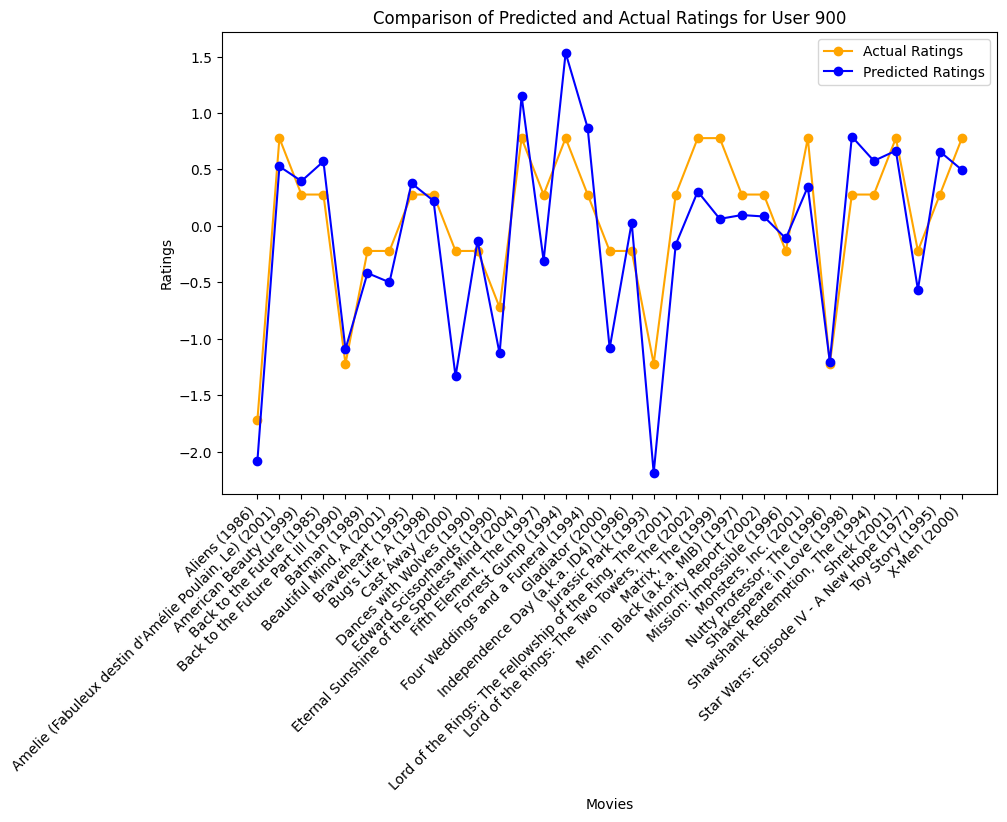

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Extract actual ratings for movies that have predictions
actual_ratings = np.array([movies_watched.at[random_user, movie] for movie in predicted_movies if movie in movies_watched.columns])

# Convert predicted ratings to a NumPy array
predicted_ratings = np.array(predicted_ratings)

# Create a line and dot graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual ratings as dots
ax.plot(predicted_movies, actual_ratings, 'o-', label='Actual Ratings', color='orange')

# Plot predicted ratings as a line
ax.plot(predicted_movies, predicted_ratings, 'o-', label='Predicted Ratings', color='blue')

ax.set_xlabel('Movies')
ax.set_ylabel('Ratings')
ax.set_title(f'Comparison of Predicted and Actual Ratings for User {random_user}')
ax.set_xticks(range(len(predicted_movies)))
ax.set_xticklabels(predicted_movies, rotation=45, ha='right')
ax.legend()

plt.show()


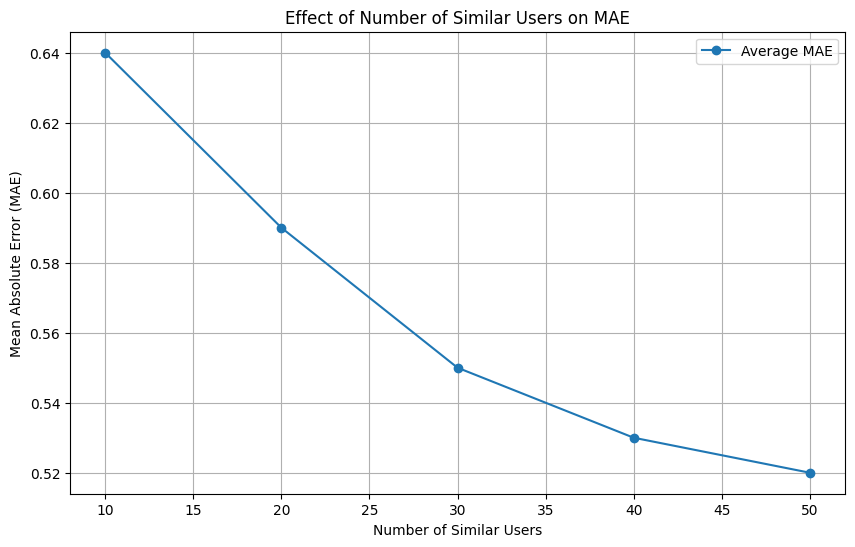

In [20]:
import matplotlib.pyplot as plt

# Number of similar users
num_similar_users = [10, 20, 30, 40, 50]

# MSE values for each set of similar users
mae_values = [
    [0.64],
    [0.59],
    [0.55],
    [0.53],
    [0.52]
]

# Plotting the graph
plt.figure(figsize=(10, 6))

plt.plot(num_similar_users, mae_values, marker='o', label=f'Average MAE')

# Add labels and title
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Effect of Number of Similar Users on MAE')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [21]:
similar_users_watched.drop(movies_watched.columns, axis=1, inplace= True, errors='ignore')
similar_users_watched.head()

title,2001: A Space Odyssey (1968),Alien (1979),American History X (1998),Austin Powers: International Man of Mystery (1997),Austin Powers: The Spy Who Shagged Me (1999),Babe (1995),Back to the Future Part II (1989),Beetlejuice (1988),Being John Malkovich (1999),"Big Lebowski, The (1998)",...,Titanic (1997),Top Gun (1986),Total Recall (1990),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)",When Harry Met Sally... (1989),Who Framed Roger Rabbit? (1988),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)"
userId,,,,,,,,,,,,,,,,,,,,,
33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.777778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN
111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173.0,NaN,NaN,0.15,NaN,NaN,NaN,-1.85,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Dictionary to store movie scores
movie_score = {}

# Iterate over each movie in the movies watched by similar users
for i in similar_users_watched.columns:
    movie_rating = similar_users_watched[i]
    total = 0
    count = 0
    
    # Iterate over each similar user
    for u in similar_users.index:
        # Check if the rating for the movie by the user is not NaN
        if pd.notna(movie_rating[u]):
            # Calculate the movie score based on similarity and rating
            score = similar_users[u] * movie_rating[u]
            total += score
            count += similar_users[u]
    
    # Calculate the average movie score
    movie_score[i] = total / count

# Convert the dictionary to a DataFrame
movie_score = pd.DataFrame(movie_score.items(), columns=['movie', 'movie_score'])

# Sort the movies based on the calculated scores in descending order
ranked_movie_score = movie_score.sort_values(by='movie_score', ascending=False)

# Display the top 'm' movies
m = 10
top_movies = ranked_movie_score.head(m)
top_movies


,movie,movie_score
5,Babe (1995),1.294118
22,Dr. Strangelove or: How I Learned to Stop Worr...,1.093750
62,Sense and Sensibility (1995),1.017524
48,Monty Python's Life of Brian (1979),0.959615
79,"Usual Suspects, The (1995)",0.946967
35,Groundhog Day (1993),0.869565
83,"Wizard of Oz, The (1939)",0.769231
12,Casablanca (1942),0.763176
52,One Flew Over the Cuckoo's Nest (1975),0.679464
10,Blade Runner (1982),0.643144
